In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from collections import defaultdict
from gensim.models import doc2vec 
from tqdm import tqdm
import networkx as nx
import pandas as pd
from pylab import rcParams
import numpy as np
from sklearn.decomposition import PCA

def get_icd10_codes():
    icd10 = defaultdict()
    with open('/Users/michalkukielka/Desktop/licencjat/results/icd10cm_codes_2018.txt', 'r+') as f:
        for line in f.readlines():
            line = line.split()
            icd10[line[0].lower()] = ' '.join(line[1:]).lower()
        return icd10

icd10_codes = get_icd10_codes()    
    
def create_relations_plot(path_to_model, path_to_graph, glove_model, output_file, min_nodes=1):
    rcParams['figure.figsize'] = 20, 15
    icd10_codes = get_icd10_codes()
    if glove_model:
        # load glove model
        vectors = pd.read_csv(path_to_model, header=None, sep=' ')
        graph = nx.read_edgelist(path_to_graph)
        
        # filter only icd10 codes
        plot_data = vectors[vectors[0].isin(graph.nodes)].rename({0: 'word'}, axis=1)
        coords = plot_data[plot_data.columns[1:]]
    else:
        # load doc2vec model
        model = doc2vec.Doc2Vec.load(path_to_model)
        graph = nx.read_edgelist(path_to_graph)
        
        # retrieve coords for every icd10 code
        coords = [model.wv.get_vector(code) for code in graph.nodes]
        plot_data = pd.DataFrame(list(graph.nodes), columns=['word'])

    pca = PCA(n_components=2)
    plot_data = plot_data.assign(x='', y='')
    plot_data[['x', 'y']] = pca.fit_transform(coords, 2)
    
    components = list(nx.connected_component_subgraphs(graph))
    # pick only subgraphs, which contain at least 3 nodes
    big_components = list(filter(lambda x: len(x.nodes) > min_nodes, components))
    for component in big_components:
        choosen_vectors = plot_data[plot_data.word.isin(component.nodes)]
        for _, row in choosen_vectors.iterrows():
            plt.scatter(choosen_vectors.x, choosen_vectors.y, cmap=plt.get_cmap('Spectral'))
            x, y, label = row.x, row.y, row.word
            plt.annotate(
                label,
                xy=(x,y),
                xytext=(-14, 14),
                textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
            )
    plt.savefig(output_file, format='svg', bbox_inches='tight', dpi=1200)
    

def create_histogram_of_relations_size(path_to_graph, output_file):
    rcParams['figure.figsize'] = 12, 8
    rcParams['axes.labelsize'] = 'xx-large'
    graph = nx.read_edgelist(path_to_graph)
    _, _, _ = plt.hist([len(i) for i in list(nx.connected_component_subgraphs(graph))], bins=6, range=(0, 6))
    plt.xlabel('Liczba kodów składających się na relację')
    plt.ylabel('Liczba relacji')
    plt.savefig(output_file, format='svg', bbox_inches='tight', dpi=1200)


GloVe

In [2]:
model_glove_50 = '/Users/michalkukielka/Desktop/licencjat/results/glove_data/symmetric_vectors/glove_vectors10_50.txt'
model_glove_150 = '/Users/michalkukielka/Desktop/licencjat/results/glove_data/symmetric_vectors/glove_vectors10_150.txt'

graph_glove_50_10_50 = '/Users/michalkukielka/Desktop/licencjat/scripts/glove_analysis/dimension_10/50/graph_glove_50'
graph_glove_50_10_100 = '/Users/michalkukielka/Desktop/licencjat/scripts/glove_analysis/dimension_10/50/graph_glove_100'

graph_glove_150_10_50 = '/Users/michalkukielka/Desktop/licencjat/scripts/glove_analysis/dimension_10/150/graph_glove_50'
graph_glove_150_10_100 = '/Users/michalkukielka/Desktop/licencjat/scripts/glove_analysis/dimension_10/150/graph_glove_100'

In [ ]:
create_relations_plot(path_to_model=model_glove_50, path_to_graph=graph_glove_50_10_50,
                      glove_model=True, output_file='plots/map_glove_50_10_50.svg')

In [ ]:
create_relations_plot(path_to_model=model_glove_50, path_to_graph=graph_glove_50_10_50, glove_model=True,
                      output_file='plots/map_glove_50_10_50_complex.svg', min_nodes=2)

Doc2Vec

In [35]:
model_doc2vec_50 = '/Users/michalkukielka/Desktop/licencjat/results/doc2vec_data/trained_model1050'
model_doc2vec_150 = '/Users/michalkukielka/Desktop/licencjat/results/doc2vec_data/trained_model10150'

graph_doc2vec_50_10_50 = '/Users/michalkukielka/Desktop/licencjat/scripts/doc2vec_analysis/dimension10/50/graph_50'
graph_doc2vec_50_10_100 = '/Users/michalkukielka/Desktop/licencjat/scripts/doc2vec_analysis/dimension10/50/graph_100'

graph_doc2vec_150_10_50 = '/Users/michalkukielka/Desktop/licencjat/scripts/doc2vec_analysis/dimension10/150/graph_50'
graph_doc2vec_150_10_100 = '/Users/michalkukielka/Desktop/licencjat/scripts/doc2vec_analysis/dimension10/150/graph_100'

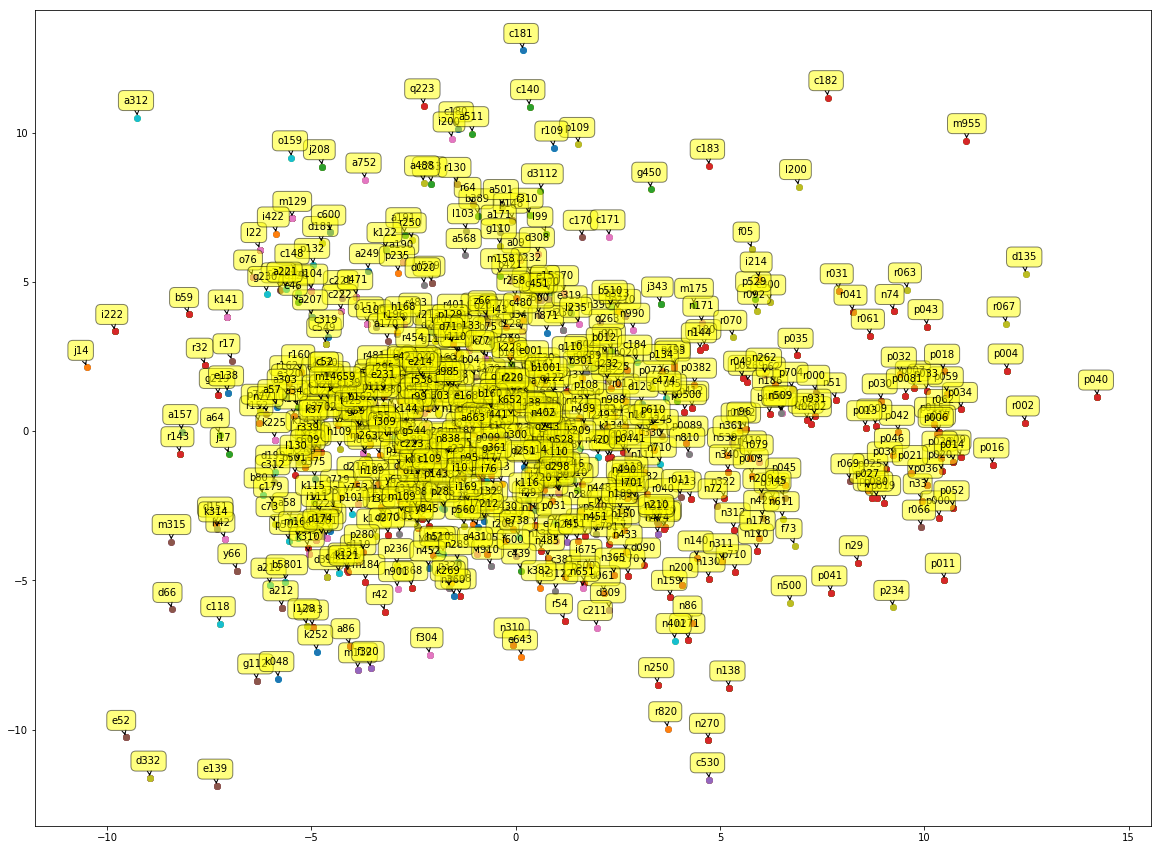

In [38]:
create_relations_plot(path_to_model=model_doc2vec_150, path_to_graph=graph_doc2vec_150_10_100,
                      glove_model=False, output_file='plots/map_doc2vec150_10_100.svg')

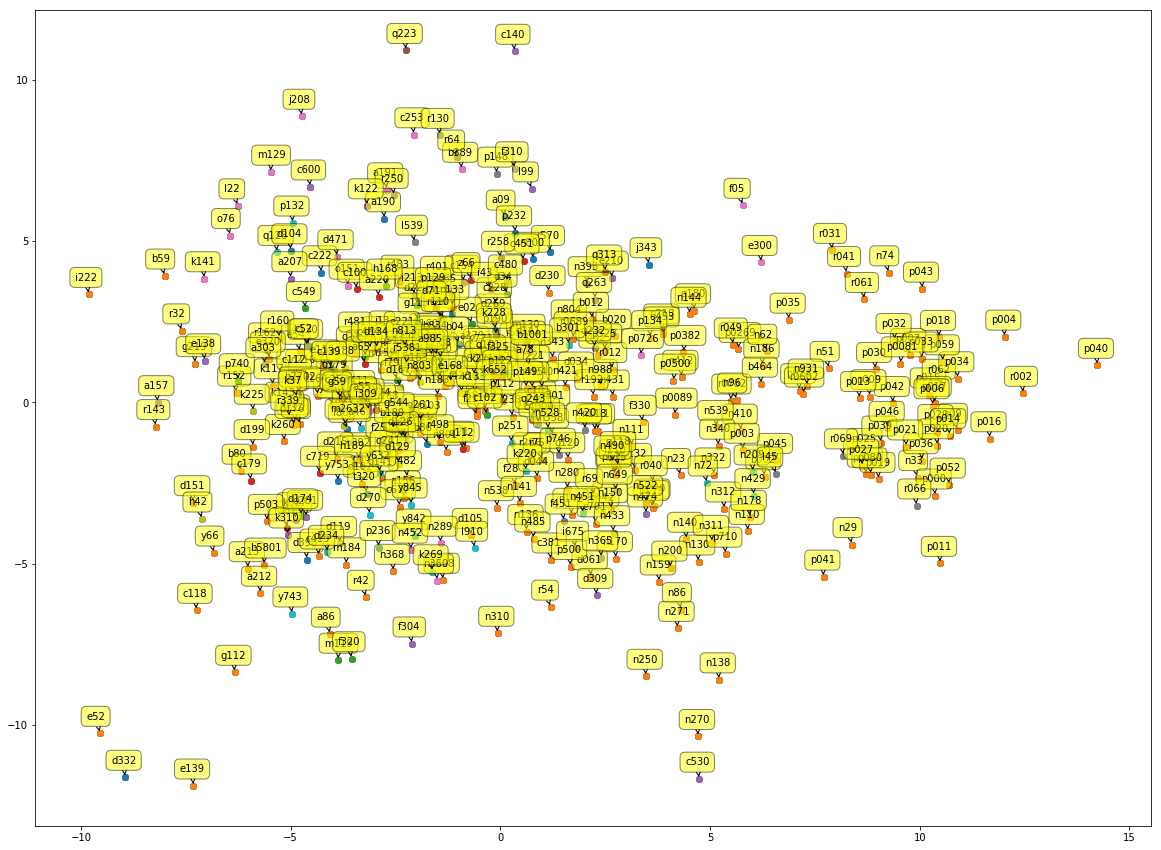

In [37]:
create_relations_plot(path_to_model=model_doc2vec_150, path_to_graph=graph_doc2vec_150_10_100, glove_model=False,
                      output_file='plots/map_doc2vec150_10_100_complex.svg', min_nodes=2)

In [4]:
import ecopy as ep

In [7]:
BCI = pd.read_csv('/Users/michalkukielka/Downloads/BCI.csv')

In [29]:
vectors = pd.read_csv(model_glove_150, header=None, sep=' ')
graph = nx.read_edgelist(graph_glove_150_10_100)
# filter only icd10 codes
plot_data = vectors[vectors[0].isin(graph.nodes)].rename({0: 'word'}, axis=1)
coords = plot_data[plot_data.columns[1:]]

In [30]:
coords.set_index(plot_data.word)

,1,2,3,4,5,6,7,8,9,10
word,,,,,,,,,,
p005,-1.542172,-0.123281,-1.396490,-2.875482,-0.748042,0.393024,1.732684,2.428141,-0.779224,-0.879990
p001,-1.951574,-0.505014,-1.359598,-2.657307,-0.879240,0.654652,1.661318,2.065667,-0.572885,-0.651542
a549,-0.727535,-0.140466,-1.500999,-3.033492,1.633532,0.678324,0.910832,1.355592,-0.987599,1.618233
k562,-0.462471,-0.586987,-0.728905,-2.930236,2.310293,0.410634,0.513992,1.568782,-0.936654,1.904919
p002,-2.355933,-0.919481,-0.919823,-2.075157,-0.732262,0.871535,1.586132,1.339032,-0.001052,-0.483480
n10,-1.116222,0.189354,-1.309565,-1.490120,-0.691392,-0.124314,1.242790,1.471656,-0.571691,-0.458873
p003,-2.431388,-1.093020,-0.765246,-2.045583,-0.749929,0.942964,1.676635,1.103294,0.101700,-0.549986
l929,-0.135738,-0.026405,-0.863757,-2.239016,1.730273,0.083929,0.663531,1.209749,-1.943335,1.317152
p004,-2.402867,-1.077824,-0.795010,-2.015975,-0.631167,0.966680,1.615717,1.013965,0.076020,-0.573466


In [31]:
coords = coords.apply(lambda x: (x - x.mean())/x.std(), axis=0)
eucD = ep.distance(coords, 'euclidean')

In [32]:
pc2 = ep.pcoa(eucD, siteNames=coords.index.values)

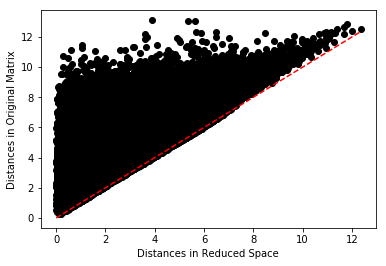

In [33]:
pc2.shepard()

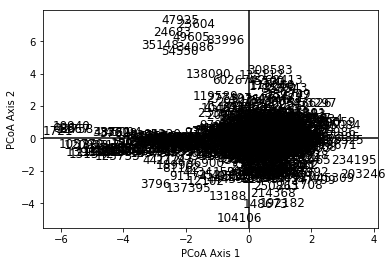

In [34]:
pc2.biplot()